In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords','punkt','wordnet','omw-1.4','vader_lexicon'])
%matplotlib inline

[nltk_data] Downloading package stopwords to /home/mohsen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mohsen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mohsen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/mohsen/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/mohsen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [196]:
def preprocess_text(text):
    stop_words = nltk.corpus.stopwords.words('english')
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
    return stemmed_text

In [4]:
data = pd.read_csv("tourist_accommodation_reviews.csv")
data.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [5]:
data.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,53644,53644,53644,53644,53644
unique,49944,2344,25,537,49938
top,rn564592095,Reviewed 1 week ago,Patong,Da Mario,I have been to this restaurant several times f...
freq,10,616,16403,279,10


In [113]:
hotel_names = data['Hotel/Restaurant name'].unique()
hotel_names.size

537

In [125]:
np.random.seed(30)
randoms =np.random.choice(hotel_names.size, 30, replace=False)
selected_hotels = np.array([])
for i in randoms:
    selected_hotels = np.append(selected_hotels, hotel_names[i])
print(selected_hotels)
len(selected_hotels)

['The Red Tablecloth' 'Natural Efe Macrobiotic World' 'Kampong Kata Hill'
 'Pesto Restaurant' 'Rustic - Eatery & Bar' 'Horn Grill Steak and Seafood'
 'The Beach Restaurant on the beach' 'Pan Bistro'
 'Kata Country House Restaurant' "JJ's Bar & Food" 'Catch Beach Club'
 'Dibuk restaurant' 'Delish Cafe' 'Kata Villa Restaurant' 'Rock Salt'
 'Mai Khao Seafood Local Restaurant' 'Tokyo Japanese Restaurant' 'Baoli'
 "Nicky's Handlebar" 'Kabuki Japanese Cuisine Theatre'
 'Buffalo Steak House - Kata Plaza' 'Hey Ha Bar & Restaurant'
 'Le Brooklyn Patong' 'Smile Bar' 'Golbasi' "Naughty Nuri's Phuket"
 'Les Diables' 'Kokosnuss' 'Taste Bar & Grill' 'The Orchids Restaurant']


30

In [126]:
selected_hotels[1]

'Natural Efe Macrobiotic World'

In [127]:
dept_emp_num =  data.groupby('Hotel/Restaurant name')['Hotel/Restaurant name'].count()
print(dept_emp_num)

Hotel/Restaurant name
+39 Italian Street Food              91
2gether Restaurant                  100
3 Spices Restaurant                 100
360 ° Bar                           100
44 Thaikitchen "KATA FOOD COURT"     93
                                   ... 
Ying Restaurant                     100
Yo Green Restaurant                 100
Yorkshire Hotel Restaurant          100
You and Me Patong                   100
i-Kroon Cafe                        100
Name: Hotel/Restaurant name, Length: 537, dtype: int64


In [129]:
df = []
for i in range(30):
    df.append(data[data['Hotel/Restaurant name'] == selected_hotels[i]]) 
    
df[0].head(5)

,ID,Review Date,Location,Hotel/Restaurant name,Review
51398,rn577384759,Reviewed 2 weeks ago,Thalang District,The Red Tablecloth,The restaurant we ate dinner at didn’t have de...
51399,rn574355125,Reviewed 4 weeks ago,Thalang District,The Red Tablecloth,Friendly service. Dirty glassware. Food was of...
51400,rn553493811,"Reviewed January 12, 2018",Thalang District,The Red Tablecloth,Stopped here for massaman curry and some fries...
51401,rn544125964,"Reviewed November 29, 2017",Thalang District,The Red Tablecloth,"We have ordered 3 meals, each was delivered wi..."
51402,rn540537260,"Reviewed November 12, 2017",Thalang District,The Red Tablecloth,"Very friendly, good fast service, tasty food. ..."


In [130]:
sentiment = SentimentIntensityAnalyzer()

In [131]:
print(sentiment.polarity_scores('This movie is great!'))
print(sentiment.polarity_scores('This movie is not great!'))

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}
{'neg': 0.473, 'neu': 0.527, 'pos': 0.0, 'compound': -0.5553}


In [132]:
for i in range(30):
    print(df[i].describe())


                 ID                 Review Date           Location  \
count            93                          93                 93   
unique           83                          80                  1   
top     rn577384759  Reviewed October 18, 2017    Thalang District   
freq              2                           4                 93   

       Hotel/Restaurant name  \
count                     93   
unique                     1   
top       The Red Tablecloth   
freq                      93   

                                                   Review  
count                                                  93  
unique                                                 83  
top     The restaurant we ate dinner at didn’t have de...  
freq                                                    2  
                 ID             Review Date Location  \
count           100                     100      100   
unique          100                      86        1   
top     rn578280586 

In [133]:
for i in range(30):
    df[i]['compound'] = [sentiment.polarity_scores(review)['compound'] for review in df[i]['Review']]
    df[i]['neg'] = [sentiment.polarity_scores(review)['neg'] for review in df[i]['Review']]
    df[i]['neu'] = [sentiment.polarity_scores(review)['neu'] for review in df[i]['Review']]
    df[i]['pos'] = [sentiment.polarity_scores(review)['pos'] for review in df[i]['Review']]

/tmp/ipykernel_17808/1476063389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]['compound'] = [sentiment.polarity_scores(review)['compound'] for review in df[i]['Review']]
/tmp/ipykernel_17808/1476063389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]['neg'] = [sentiment.polarity_scores(review)['neg'] for review in df[i]['Review']]
/tmp/ipykernel_17808/1476063389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

/tmp/ipykernel_17808/1476063389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]['neu'] = [sentiment.polarity_scores(review)['neu'] for review in df[i]['Review']]
/tmp/ipykernel_17808/1476063389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]['pos'] = [sentiment.polarity_scores(review)['pos'] for review in df[i]['Review']]
/tmp/ipykernel_17808/1476063389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

/tmp/ipykernel_17808/1476063389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]['neg'] = [sentiment.polarity_scores(review)['neg'] for review in df[i]['Review']]
/tmp/ipykernel_17808/1476063389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]['neu'] = [sentiment.polarity_scores(review)['neu'] for review in df[i]['Review']]
/tmp/ipykernel_17808/1476063389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

/tmp/ipykernel_17808/1476063389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]['compound'] = [sentiment.polarity_scores(review)['compound'] for review in df[i]['Review']]
/tmp/ipykernel_17808/1476063389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]['neg'] = [sentiment.polarity_scores(review)['neg'] for review in df[i]['Review']]
/tmp/ipykernel_17808/1476063389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

/tmp/ipykernel_17808/1476063389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]['neg'] = [sentiment.polarity_scores(review)['neg'] for review in df[i]['Review']]
/tmp/ipykernel_17808/1476063389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]['neu'] = [sentiment.polarity_scores(review)['neu'] for review in df[i]['Review']]
/tmp/ipykernel_17808/1476063389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [134]:
df[5].head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
19134,rn578783890,Reviewed 1 week ago,Kata Beach,Horn Grill Steak and Seafood,"Friendly staff, really great food, live music ...",0.9392,0.000,0.490,0.510
19135,rn575334806,Reviewed 3 weeks ago,Kata Beach,Horn Grill Steak and Seafood,Think I just had the best lamb shank I’ve ever...,0.9058,0.024,0.745,0.231
19136,rn574879957,Reviewed 4 weeks ago,Kata Beach,Horn Grill Steak and Seafood,"THIS IS NOT A CHILDREN FRIENDLY RESTAURANT, AN...",-0.3741,0.153,0.745,0.103
19137,rn574280807,Reviewed 4 weeks ago,Kata Beach,Horn Grill Steak and Seafood,We were all craving some meat so found this pl...,0.3710,0.073,0.805,0.122
19138,rn573395756,Reviewed 5 weeks ago,Kata Beach,Horn Grill Steak and Seafood,"We are a big group 7 adults to kinds, and love...",0.8201,0.049,0.712,0.239


In [135]:
df[5][['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,100.000000,100.000000,100.000000,100.000000
mean,0.668307,0.026670,0.747200,0.226180
std,0.412437,0.045818,0.112528,0.121147
min,-0.701000,0.000000,0.486000,0.000000
25%,0.592800,0.000000,0.681750,0.139000
50%,0.835200,0.000000,0.745000,0.218500
75%,0.932200,0.043000,0.831250,0.309750
max,0.985700,0.209000,1.000000,0.514000


<AxesSubplot: xlabel='compound', ylabel='Count'>

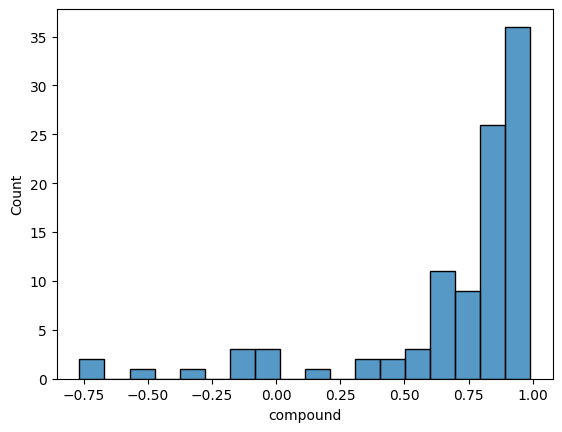

In [40]:
sns.histplot(df[7]['compound'])

<AxesSubplot: xlabel='pos', ylabel='Count'>

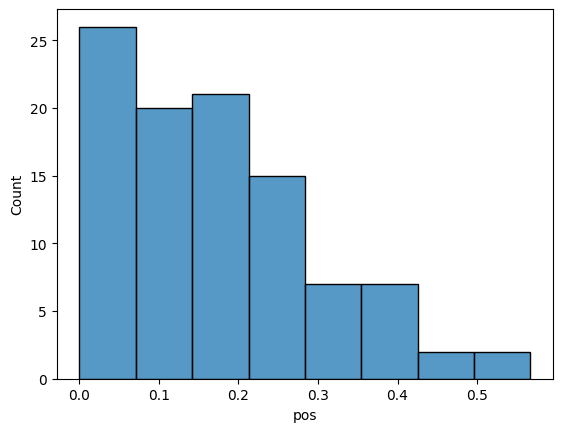

In [136]:
sns.histplot(df[20]['pos'])

<AxesSubplot: xlabel='neg', ylabel='Count'>

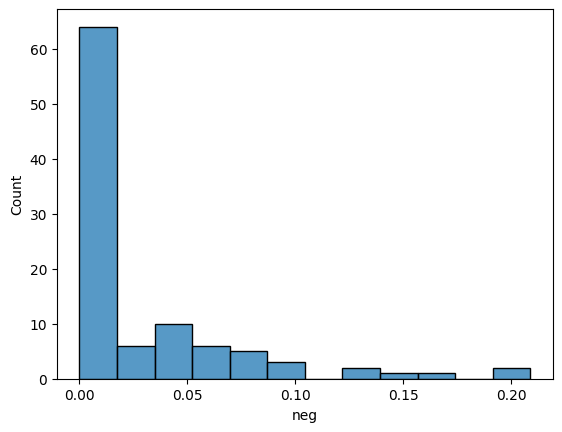

In [137]:
sns.histplot(df[5]['neg'])

In [138]:
(df[7]['compound']<=0).sum()

8

In [139]:
df[7]['Review'].count()

100

In [140]:
df_tmp = pd.DataFrame(columns=['Name', '% negetive reviews'])
df_tmp

,Name,% negetive reviews


In [155]:
d = {'Name': [df[0].iloc[0,3]], '% negetive reviews': [(df[1]['compound']<=0).sum()/df[1]['Review'].count()*100]}
df_tmp = pd.DataFrame(data=d)
df_tmp

,Name,% negetive reviews
0,The Red Tablecloth,5.0


In [145]:
df[0].iloc[0,3]

'The Red Tablecloth'

In [168]:
lst = []

# Create List of list
for i in range(30):
    lst.append([df[i].iloc[0,3], (df[i]['compound']<=0).sum()/df[i]['Review'].count()*100])

In [170]:
df_negative_percent = pd.DataFrame(lst, columns =['Name', '% negetive reviews'])
df_negative_percent

,Name,% negetive reviews
0,The Red Tablecloth,22.580645
1,Natural Efe Macrobiotic World,5.000000
2,Kampong Kata Hill,9.000000
3,Pesto Restaurant,7.000000
4,Rustic - Eatery & Bar,4.000000
5,Horn Grill Steak and Seafood,11.000000
6,The Beach Restaurant on the beach,16.000000
7,Pan Bistro,8.000000
8,Kata Country House Restaurant,26.000000
9,JJ's Bar & Food,3.000000


In [171]:
df_negative_percent.sort_values(by='% negetive reviews')

,Name,% negetive reviews
24,Golbasi,0.000000
14,Rock Salt,1.000000
9,JJ's Bar & Food,3.000000
26,Les Diables,3.225806
4,Rustic - Eatery & Bar,4.000000
19,Kabuki Japanese Cuisine Theatre,4.000000
1,Natural Efe Macrobiotic World,5.000000
27,Kokosnuss,5.000000
10,Catch Beach Club,5.000000
22,Le Brooklyn Patong,5.376344


<AxesSubplot: xlabel='% negetive reviews', ylabel='Name'>

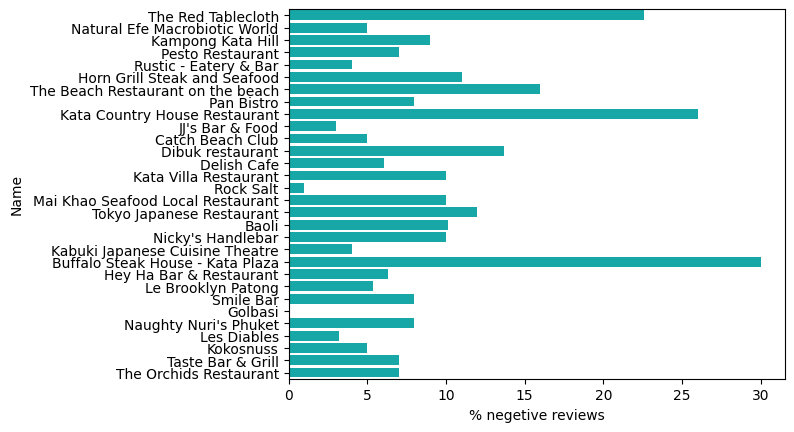

In [178]:
sns.barplot(data=df_negative_percent, x='% negetive reviews', y=df_negative_percent.Name, color='c', orient='h')

In [182]:
selected_df = df[20]

In [201]:
selected_df['processed_review'] = selected_df['Review'].apply(preprocess_text)
positive_review = selected_df.loc[selected_df['compound']>0,:]
negative_review = selected_df.loc[selected_df['compound']<=0,:]
positive_review.head()

/tmp/ipykernel_17808/1520172887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['processed_review'] = selected_df['Review'].apply(preprocess_text)


,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
46637,rn580506699,Reviewed 5 days ago,Kata Beach,Buffalo Steak House - Kata Plaza,My husband & I visited 4 years ago and had the...,0.6369,0.000,0.907,0.093,"[husband, visit, 4, year, ago, best, thai, bbq..."
46638,rn572627186,"Reviewed April 11, 2018",Kata Beach,Buffalo Steak House - Kata Plaza,Always come here for delicious fillet steaks c...,0.9153,0.000,0.597,0.403,"[alway, come, delici, fillet, steak, cook, exa..."
46639,rn571791160,"Reviewed April 7, 2018",Kata Beach,Buffalo Steak House - Kata Plaza,After a walk along the street we finally decid...,0.5255,0.113,0.729,0.158,"[walk, along, street, final, decid, upon, stea..."
46641,rn565433823,"Reviewed March 9, 2018",Kata Beach,Buffalo Steak House - Kata Plaza,House vine is good!\r\nFood average.\r\nWaterm...,0.8114,0.113,0.594,0.293,"[hous, vine, good, food, averag, watermelon, f..."
46642,rn560613804,"Reviewed February 15, 2018",Kata Beach,Buffalo Steak House - Kata Plaza,"Good food, wine and beer\r\nTender meet\r\nChi...",0.9217,0.000,0.496,0.504,"[good, food, wine, beer, tender, meet, childre..."


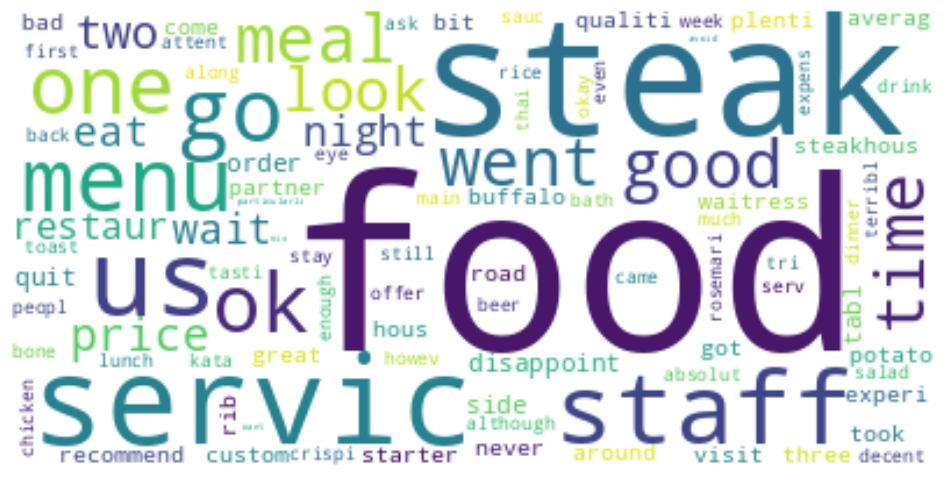

In [202]:
neg_tokens = [word for review in negative_review['processed_review'] for word in review]
wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

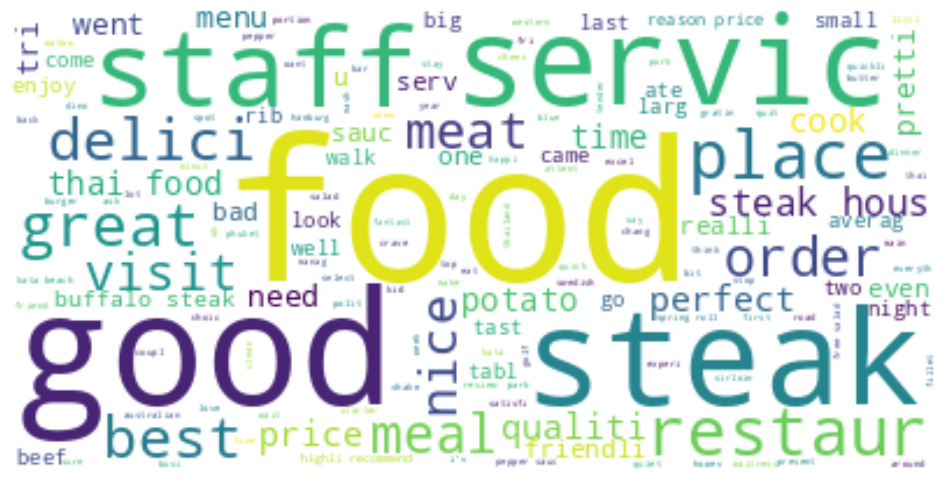

In [203]:
pos_tokens = [word for review in positive_review['processed_review'] for word in review]
wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()